   0.84  -0.25  -1.4058126562315
0 -0.22   0.92          0.747931
1  0.56   0.82          0.491664
2  0.20   0.78          1.006142
3 -0.79  -0.25         -1.571608
4 -0.55  -0.51         -0.959799


<IPython.core.display.Javascript object>


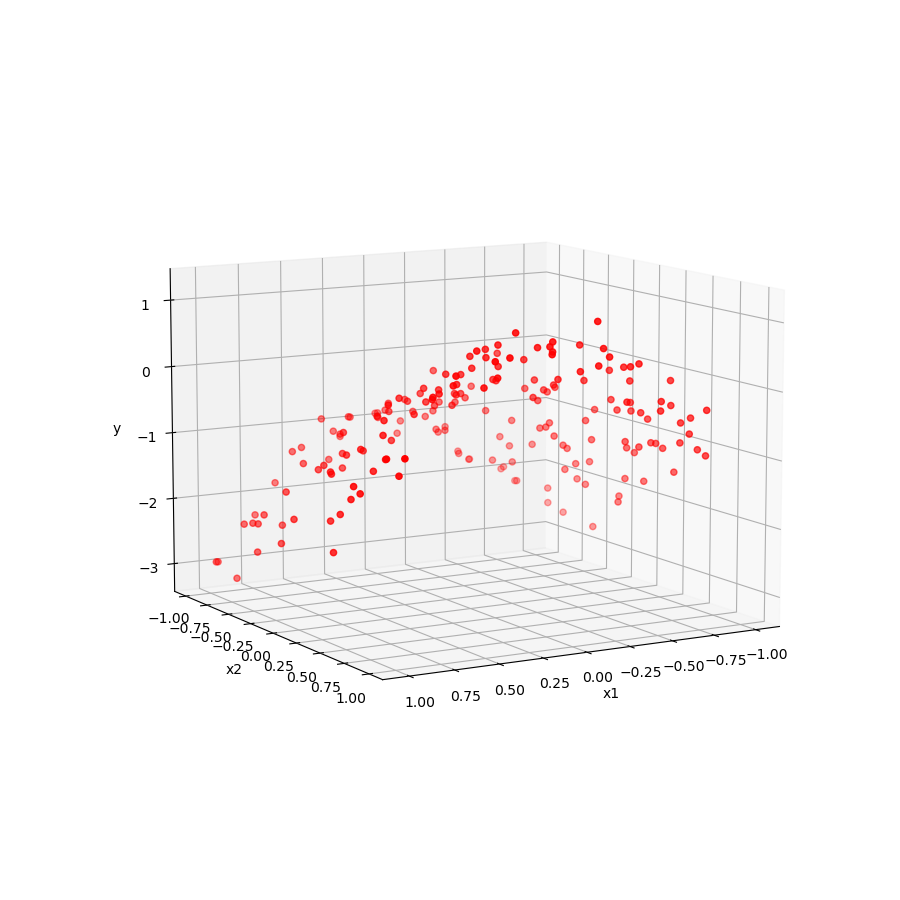

In [164]:
# id:8--16-8
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("week3.csv")
print(df.head())

X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]


fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], y, c='red')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='red', marker = 'o')
ax.view_init(azim=60,elev=10)
plt.show()

In [165]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X)
X_poly.shape

(198, 21)

In [255]:
from sklearn.linear_model import Lasso
C = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
for c in C:
    a = 1/(2*c)
    linlasso = Lasso(alpha=a).fit(X_poly, y)
    print(a)
    print('lasso regression linear model intercept: {}'
         .format(linlasso.intercept_))
    print('lasso regression linear model coeff:\n{}'
         .format(linlasso.coef_))

5.0
lasso regression linear model intercept: -0.7535938687916134
lasso regression linear model coeff:
[ 0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
  0. -0.  0.]
1.0
lasso regression linear model intercept: -0.7535938687916134
lasso regression linear model coeff:
[ 0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
  0. -0.  0.]
0.5
lasso regression linear model intercept: -0.7535938687916134
lasso regression linear model coeff:
[ 0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
  0. -0.  0.]
0.1
lasso regression linear model intercept: -0.391980186000374
lasso regression linear model coeff:
[ 0.          0.          0.74218665 -0.95563819  0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.          0.         -0.
  0.         -0.          0.        ]
0.05
lasso regression linear model intercept: -0.2092721098019995
lasso regression linear model coe

In [250]:
X_test=[]
grid = np.linspace(-2,2)
for i in grid:
    for j in grid:
        X_test.append([i,j])
X_test = np.array(X_test)
X_poly_test = poly.fit_transform(X_test)
X_poly_test.shape

(2500, 21)

<IPython.core.display.Javascript object>


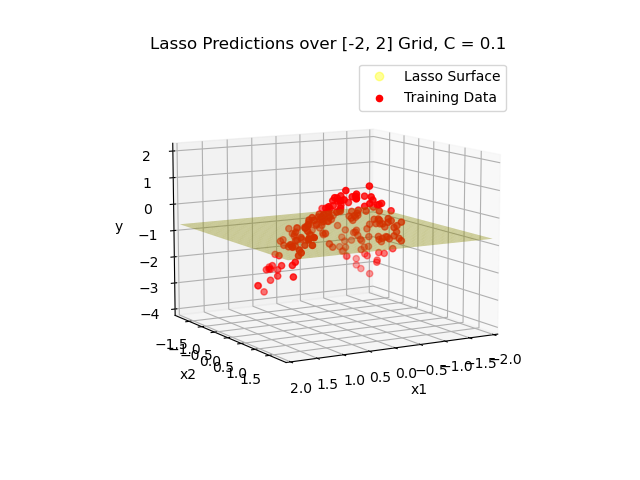

In [261]:
c = 0.1

linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
Y = linlasso.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


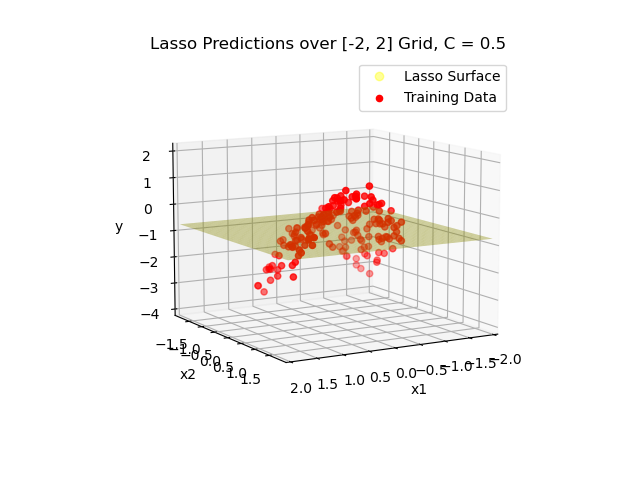

In [263]:
c = 0.5

linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
Y = linlasso.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


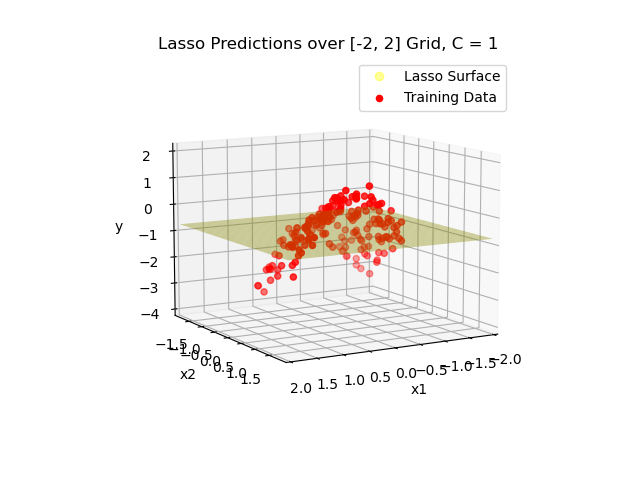

In [264]:
c = 1

linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
Y = linlasso.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


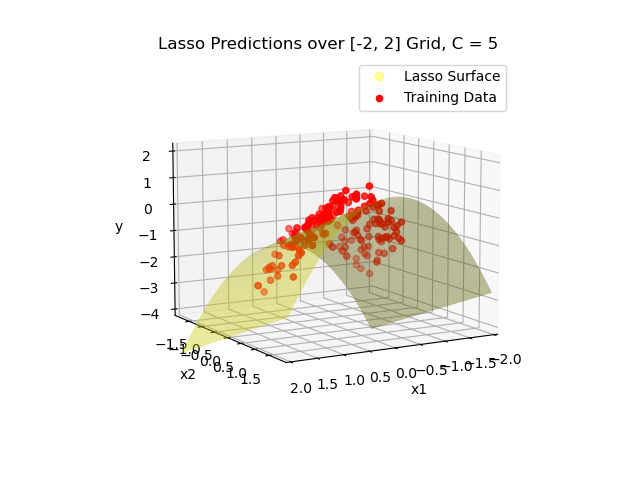

In [265]:
c = 5

linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
Y = linlasso.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


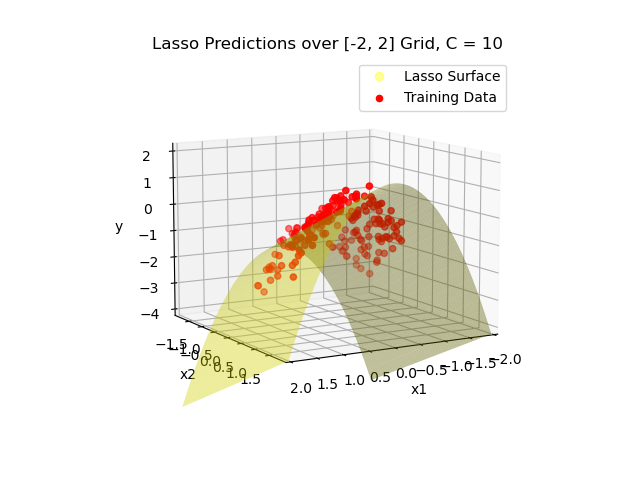

In [266]:
c = 10

linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
Y = linlasso.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


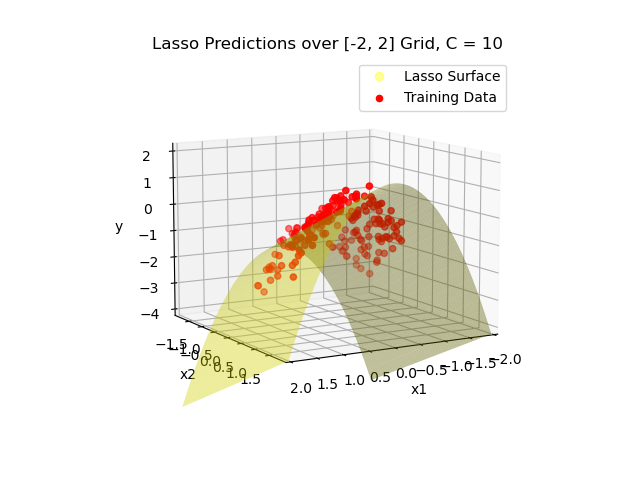

In [267]:
c = 10

linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
Y = linlasso.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


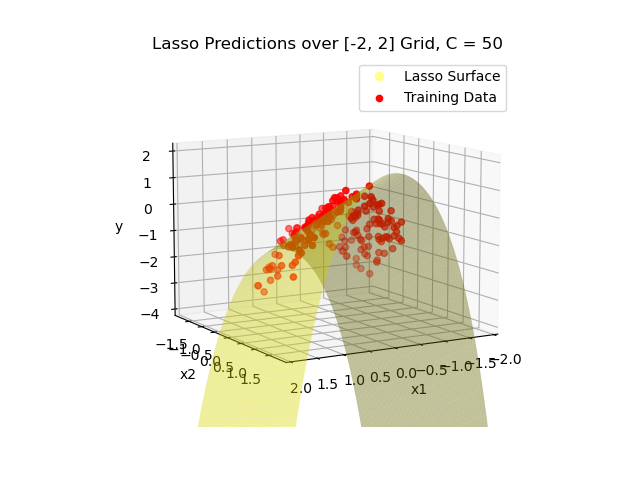

In [268]:
c = 50

linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
Y = linlasso.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


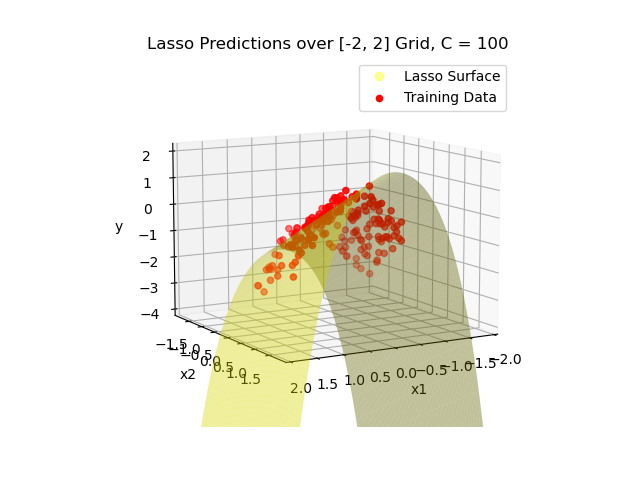

In [269]:
c = 100

linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
Y = linlasso.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


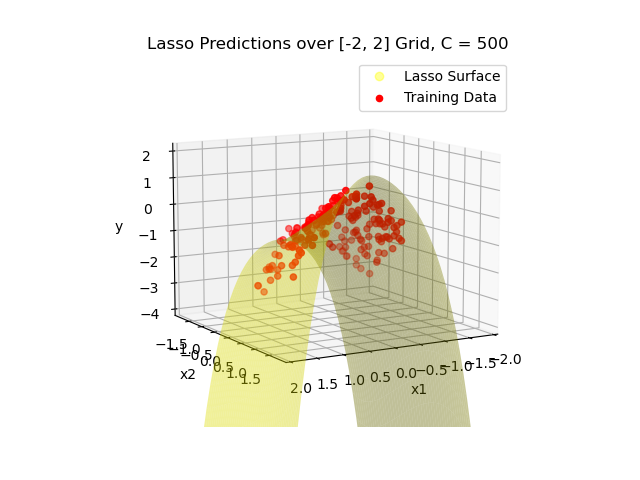

In [270]:
c = 500

linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
Y = linlasso.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

/tmp/ipykernel_112789/1873992622.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


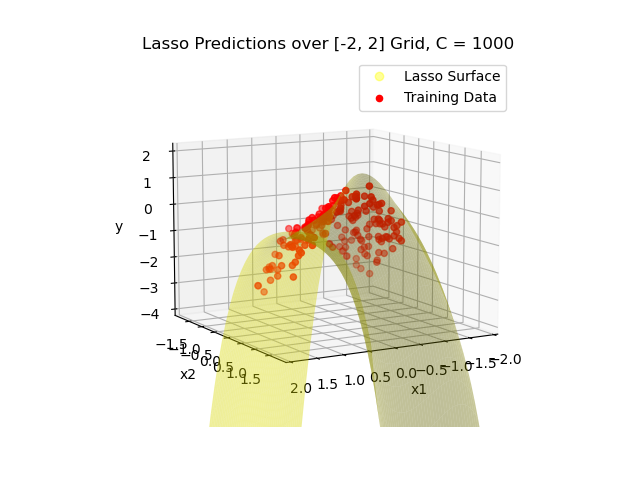

In [271]:
c = 1000

linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
Y = linlasso.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

In [272]:
from sklearn.linear_model import Ridge

for c in C:
    a = 1/(2*c)
    linridge = Ridge(alpha= a).fit(X_poly, y)
    print(a)
    print('ridge regression linear model intercept: {}'
         .format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'
         .format(linridge.coef_))

5.0
ridge regression linear model intercept: -0.19885238227963253
ridge regression linear model coeff:
[ 0.          0.03830958  0.77832203 -0.96548931 -0.003144    0.02785517
 -0.0599238   0.10816731  0.0842492   0.20899008 -0.77493189  0.00417413
 -0.16915473  0.05877964  0.03898967 -0.02625552  0.0333854  -0.00939593
 -0.01889527  0.03573698  0.0568579 ]
1.0
ridge regression linear model intercept: -0.10898311892618628
ridge regression linear model coeff:
[ 0.          0.03622476  0.96214974 -1.21888692 -0.06863871 -0.00559629
 -0.13748046  0.06480367  0.22044208  0.11313786 -0.77540938  0.0235454
 -0.00830923  0.15976448  0.00729087  0.0171588  -0.02710671 -0.05860355
 -0.05558581  0.01181061 -0.04642307]
0.5
ridge regression linear model intercept: -0.08334688455495032
ridge regression linear model coeff:
[ 0.          0.03248109  1.007968   -1.3305447  -0.11254314 -0.02739412
 -0.19077625  0.0443242   0.32272797  0.06970231 -0.71319927  0.05004527
  0.07412249  0.20708674 -0.0029

<IPython.core.display.Javascript object>


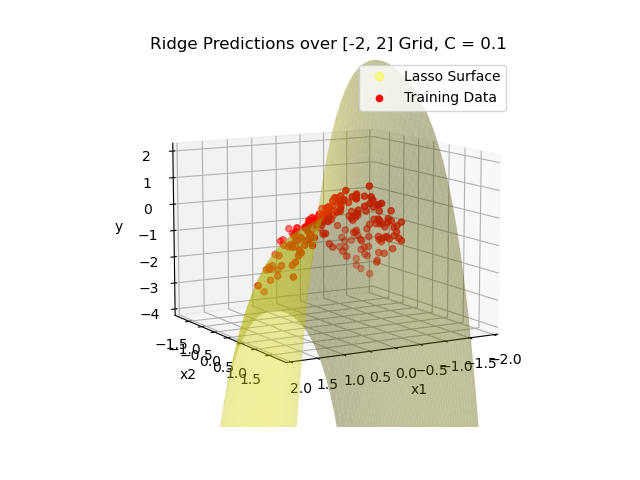

In [274]:
c = 0.1

linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
Y = linridge.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Ridge Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


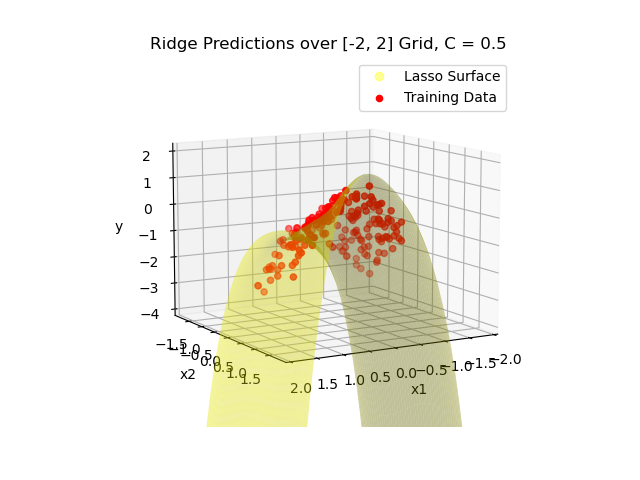

In [315]:
c = 0.5

linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
Y = linridge.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Ridge Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


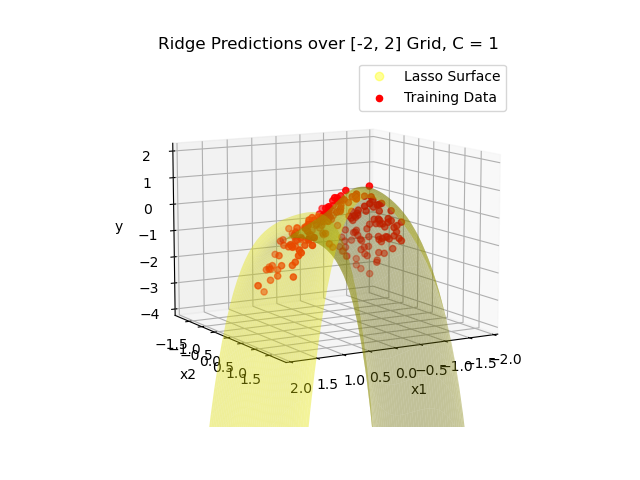

In [276]:
c = 1

linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
Y = linridge.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Ridge Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


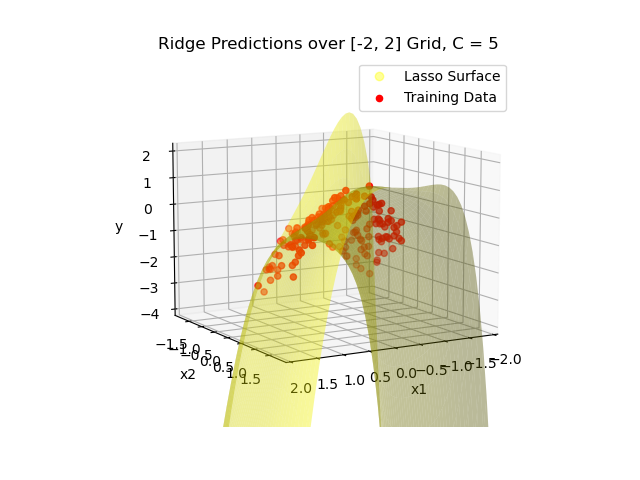

In [316]:
c = 5

linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
Y = linridge.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Ridge Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


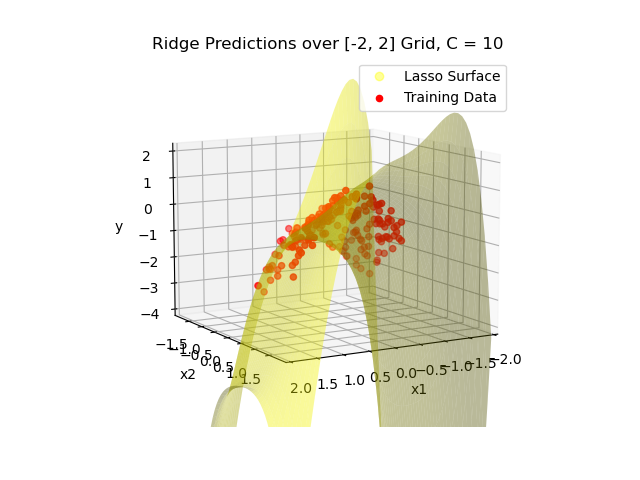

In [317]:
c = 10

linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
Y = linridge.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Ridge Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


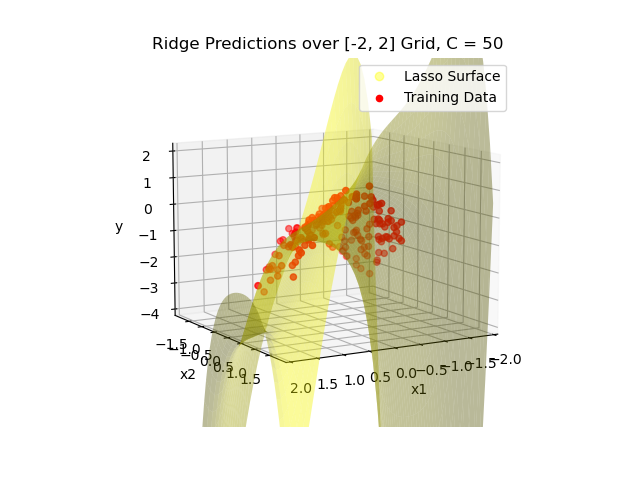

In [318]:
c = 50

linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
Y = linridge.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Ridge Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


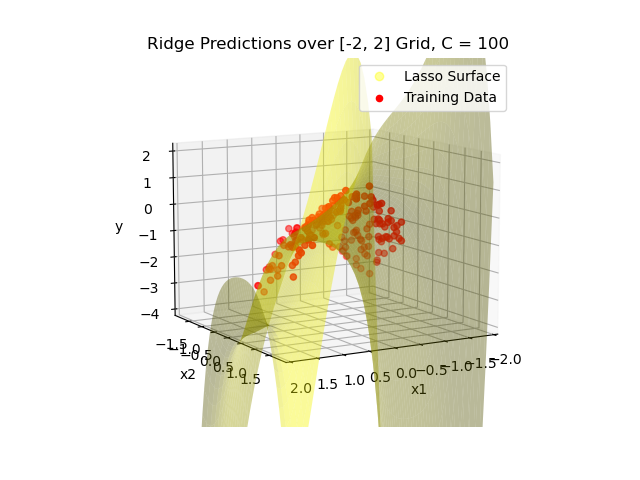

In [319]:
c = 100

linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
Y = linridge.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Ridge Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


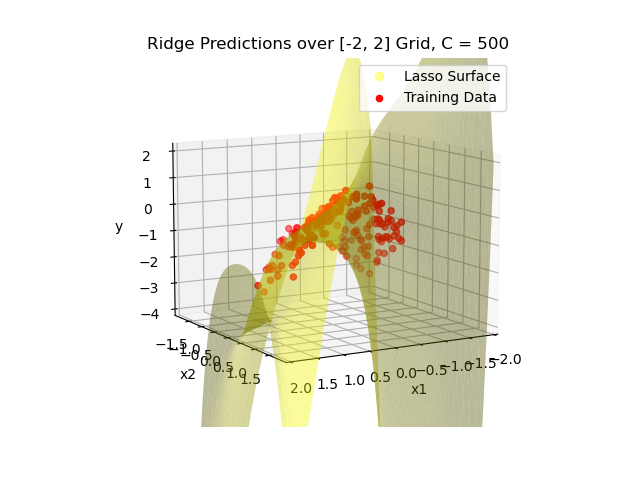

In [320]:
c = 500

linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
Y = linridge.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Ridge Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


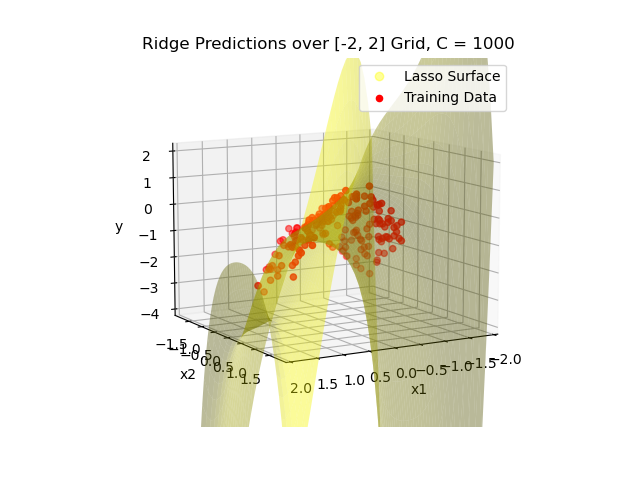

In [321]:
c = 1000

linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
Y = linridge.predict(X_poly_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
surface = ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), Y.reshape(50,50), color='yellow', alpha=0.4)
ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o', alpha=0.4)
plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
ax.set_title("Ridge Predictions over [-2, 2] Grid, C = " + str(c))
ax.view_init(azim=60,elev=10)
plt.show()

<IPython.core.display.Javascript object>


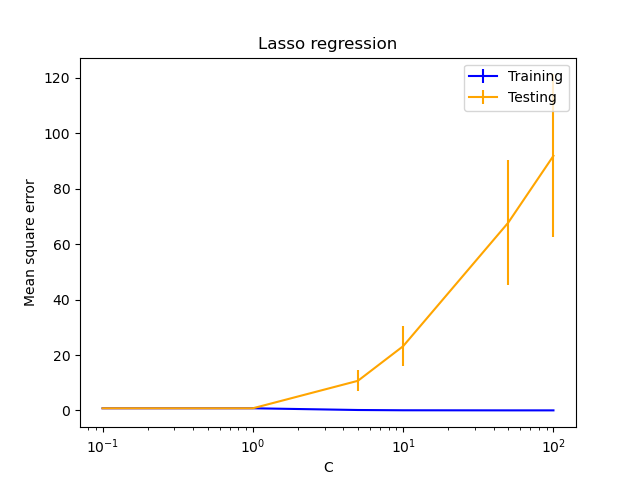

In [314]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
%matplotlib notebook
kmeans = KFold(n_splits = 5)

C = [0.1,0.5,1,5,10,50,100]

mean_error=[]; std_error=[]; df_results = []  
mean_error_test=[]; std_error_test=[]; df_results_test = []

for c in C:
    mse_temp = []
    mse_temp_test = []
    
    model = Lasso(alpha=1/(2*c)) 
                
    for train, test in kmeans.split(X_poly):
        model.fit(X_poly[train], y[train])
        Y = model.predict(X_poly[test])
        Y_test = model.predict(X_poly_test[test])
        mse = mean_squared_error(y[test],Y)
        mse_test = mean_squared_error(y[test],Y_test)
        mse_temp.append(mse)
        mse_temp_test.append(mse_test)
    mean_error.append(np.array(mse_temp).mean())
    mean_error_test.append(np.array(mse_temp_test).mean())
    std_error.append(np.array(mse_temp).std())
    std_error_test.append(np.array(mse_temp_test).std())

train = plt.errorbar(C, mean_error, yerr=std_error, color ='blue')
test = plt.errorbar(C, mean_error_test, yerr=std_error_test, color ='orange')
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Lasso regression')
plt.xscale('log')
plt.legend([train, test], ["Training", "Testing"])
plt.show()

<IPython.core.display.Javascript object>


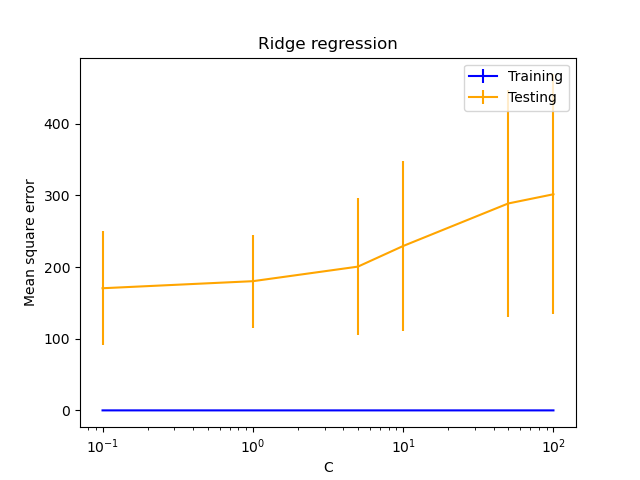

In [313]:
%matplotlib notebook
kmeans = KFold(n_splits = 5)

C = [0.1,1,5,10,50, 100]

mean_error=[]; std_error=[]; df_results = []  
mean_error_test=[]; std_error_test=[]; df_results_test = []

for c in C:
    mse_temp = []
    mse_temp_test = []
    
    model = Ridge(alpha=1/(2*c)) 
                
    for train, test in kmeans.split(X_poly):
        model.fit(X_poly[train], y[train])
        Y = model.predict(X_poly[test])
        Y_test = model.predict(X_poly_test[test])
        mse = mean_squared_error(y[test],Y)
        mse_test = mean_squared_error(y[test],Y_test)
        mse_temp.append(mse)
        mse_temp_test.append(mse_test)
    mean_error.append(np.array(mse_temp).mean())
    mean_error_test.append(np.array(mse_temp_test).mean())
    std_error.append(np.array(mse_temp).std())
    std_error_test.append(np.array(mse_temp_test).std())

train = plt.errorbar(C, mean_error, yerr=std_error, color ='blue')
test = plt.errorbar(C, mean_error_test, yerr=std_error_test, color ='orange')
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Ridge regression')
plt.xscale('log')
plt.legend([train, test], ["Training", "Testing"])
plt.show()